In [2]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, adjusted_rand_score


In [11]:
# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)


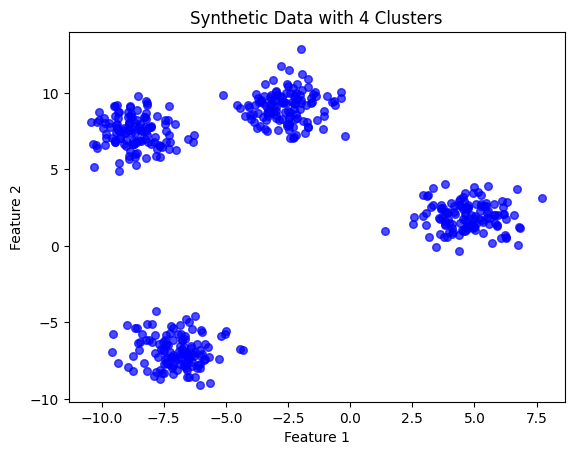

In [12]:
# Visualize synthetic data
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=30, alpha=0.7)
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [13]:
# Convert data to TensorFlow tensors
X_tensor = tf.constant(X, dtype=tf.float32)


In [14]:
# KMeans functions
def assign_to_nearest_centroid(X_tensor, centroids):
    distances = tf.reduce_sum(tf.square(tf.expand_dims(X_tensor, 1) - centroids), axis=2)
    return tf.argmin(distances, axis=1)

def update_centroids(X_tensor, labels, k):
    new_centroids = []
    for i in range(k):
        points_assigned_to_centroid = tf.boolean_mask(X_tensor, tf.equal(labels, i))
        new_centroid = tf.reduce_mean(points_assigned_to_centroid, axis=0)
        new_centroids.append(new_centroid)
    return tf.stack(new_centroids)

def run_kmeans(X_tensor, k, num_iterations=100):
    centroids = tf.Variable(tf.gather(X_tensor, np.random.choice(X_tensor.shape[0], k, replace=False)))
    for i in range(num_iterations):
        labels = assign_to_nearest_centroid(X_tensor, centroids)
        new_centroids = update_centroids(X_tensor, labels, k)
        if tf.reduce_all(tf.equal(new_centroids, centroids)):
            break
        centroids.assign(new_centroids)
    return labels.numpy(), centroids.numpy()


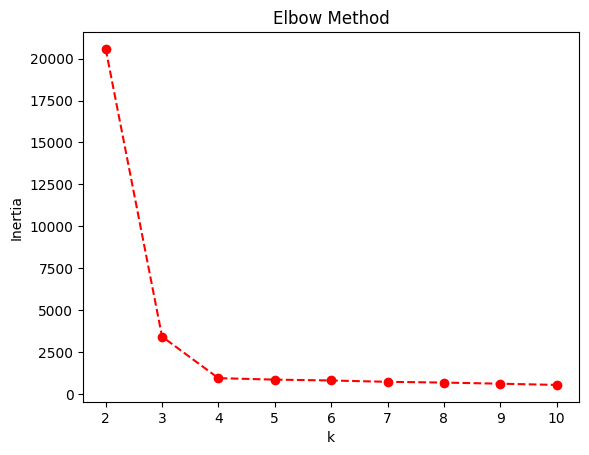

In [15]:
# Elbow method to find optimal k
inertia = []
for k in range(2, 11):
    labels, centroids = run_kmeans(X_tensor, k)

    # Compute inertia (sum of squared distances to nearest centroid)
    distances = tf.reduce_sum(tf.square(tf.expand_dims(X_tensor, 1) - centroids), axis=2)
    nearest_distances = tf.reduce_min(distances, axis=1)
    inertia.append(tf.reduce_sum(nearest_distances).numpy())

plt.plot(range(2, 11), inertia, 'ro--')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


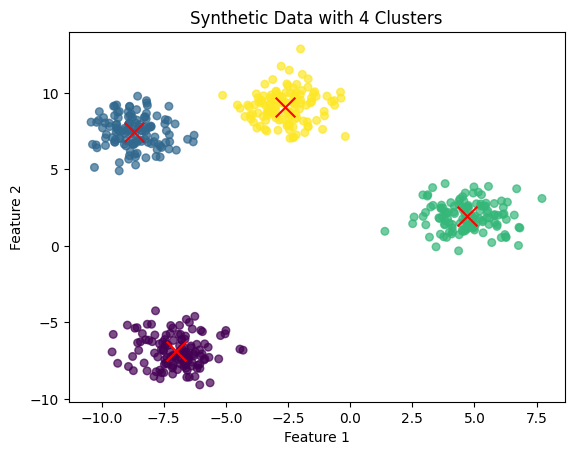

In [16]:
# Set optimal k
k_optimal = 4
final_labels, final_centroids = run_kmeans(X_tensor, k_optimal)

# Visualize clustered data
plt.scatter(X[:, 0], X[:, 1], c=final_labels, marker='o', s=30, alpha=0.7, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=200, c='red', marker='x')  # Centroids
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [17]:
# Calculate silhouette score
sil_score = silhouette_score(X, final_labels)
print("Silhouette score for k=4: ", sil_score)


Silhouette score for k=4:  0.7911042588289479


In [18]:
# Calculate adjusted Rand index
ari_score = adjusted_rand_score(y, final_labels)
print("Adjusted Rand score for k=4: ", ari_score)


Adjusted Rand score for k=4:  1.0
